# 



In [87]:
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import LineString, Point
import rasterio as rio
import pandas as pd
import matplotlib as mpl

In [88]:
import sys
sys.path.append('/Users/home/whitefar/DATA/code/REMOTE_SENSING/ICESAT/')
from cross_channel import icesat_dataset

In [89]:
ds = icesat_dataset("/Volumes/arc_02/REMOTE_SENSING/ICESAT2/ATLAS/ATLXI/ds_subset_kamb_20201111.nc")

For this dataset
cycle number, corresponding number of points
3    2356
4    2356
5    2356
6    2356
7    2356
8    2356
9    2356
Name: cycle_number, dtype: int64
cycle number, corresponding number of non NaN points
3    2334
8    2071
7    1568
5    1281
6    1267
4    1261
9     251
Name: cycle_number, dtype: int64


Index(['ref_pt', 'cycle_number', 'h_corr', 'utc_time', 'h_corr_sigma',
       'delta_time', 'latitude', 'longitude', 'referencegroundtrack', 'x', 'y',
       'geometry'],
      dtype='object')

In [95]:
ds.gda['dates'] = [ts.date() for ts in ds.gda.utc_time]
ds.gda.dates.unique()

array([datetime.date(2019, 4, 5), NaT, datetime.date(2019, 10, 4),
       datetime.date(2020, 1, 3), datetime.date(2020, 4, 3),
       datetime.date(2020, 10, 1), datetime.date(2020, 7, 2),
       datetime.date(2019, 4, 9), datetime.date(2020, 4, 7),
       datetime.date(2020, 7, 6), datetime.date(2019, 10, 8),
       datetime.date(2019, 4, 21), datetime.date(2019, 10, 19),
       datetime.date(2020, 1, 18), datetime.date(2020, 7, 18),
       datetime.date(2020, 10, 17), datetime.date(2019, 4, 25),
       datetime.date(2019, 10, 23), datetime.date(2020, 4, 22),
       datetime.date(2020, 7, 22), datetime.date(2020, 1, 22),
       datetime.date(2019, 5, 8), datetime.date(2019, 8, 7),
       datetime.date(2019, 11, 6), datetime.date(2020, 5, 5),
       datetime.date(2020, 8, 4), datetime.date(2020, 2, 5),
       datetime.date(2019, 5, 24), datetime.date(2019, 8, 22),
       datetime.date(2020, 2, 20), datetime.date(2020, 8, 20),
       datetime.date(2020, 5, 21), datetime.date(2019, 6, 6

In [96]:
ds.gda.h_corr_sigma

18585     0.008314
18586          NaN
18587     0.030079
18588     0.009161
18589     0.008599
            ...   
369392         NaN
369393    0.007067
369394         NaN
369395         NaN
369396         NaN
Name: h_corr_sigma, Length: 16492, dtype: float32

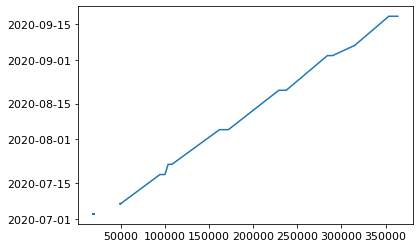

In [97]:
plt.plot(ds.gda[ds.gda.cycle_number==8].utc_time)

In [98]:
# ds.dadh.cycle_number.max()

In [99]:
print(dir(ds))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'channel_mid', 'gda', 'gda_lines', 'getdata_alllines', 'getdata_dhdt', 'getdata_line', 'is_lines', 'meta', 'plot_dhdt_crosssection', 'plot_dhdt_crosssection_map', 'plot_dhdt_map', 'plot_icesat_lines_map', 'plot_line_crosssection', 'plot_multiple_dhdt_crosssection', 'plot_multiple_dhdt_crosssection_map']


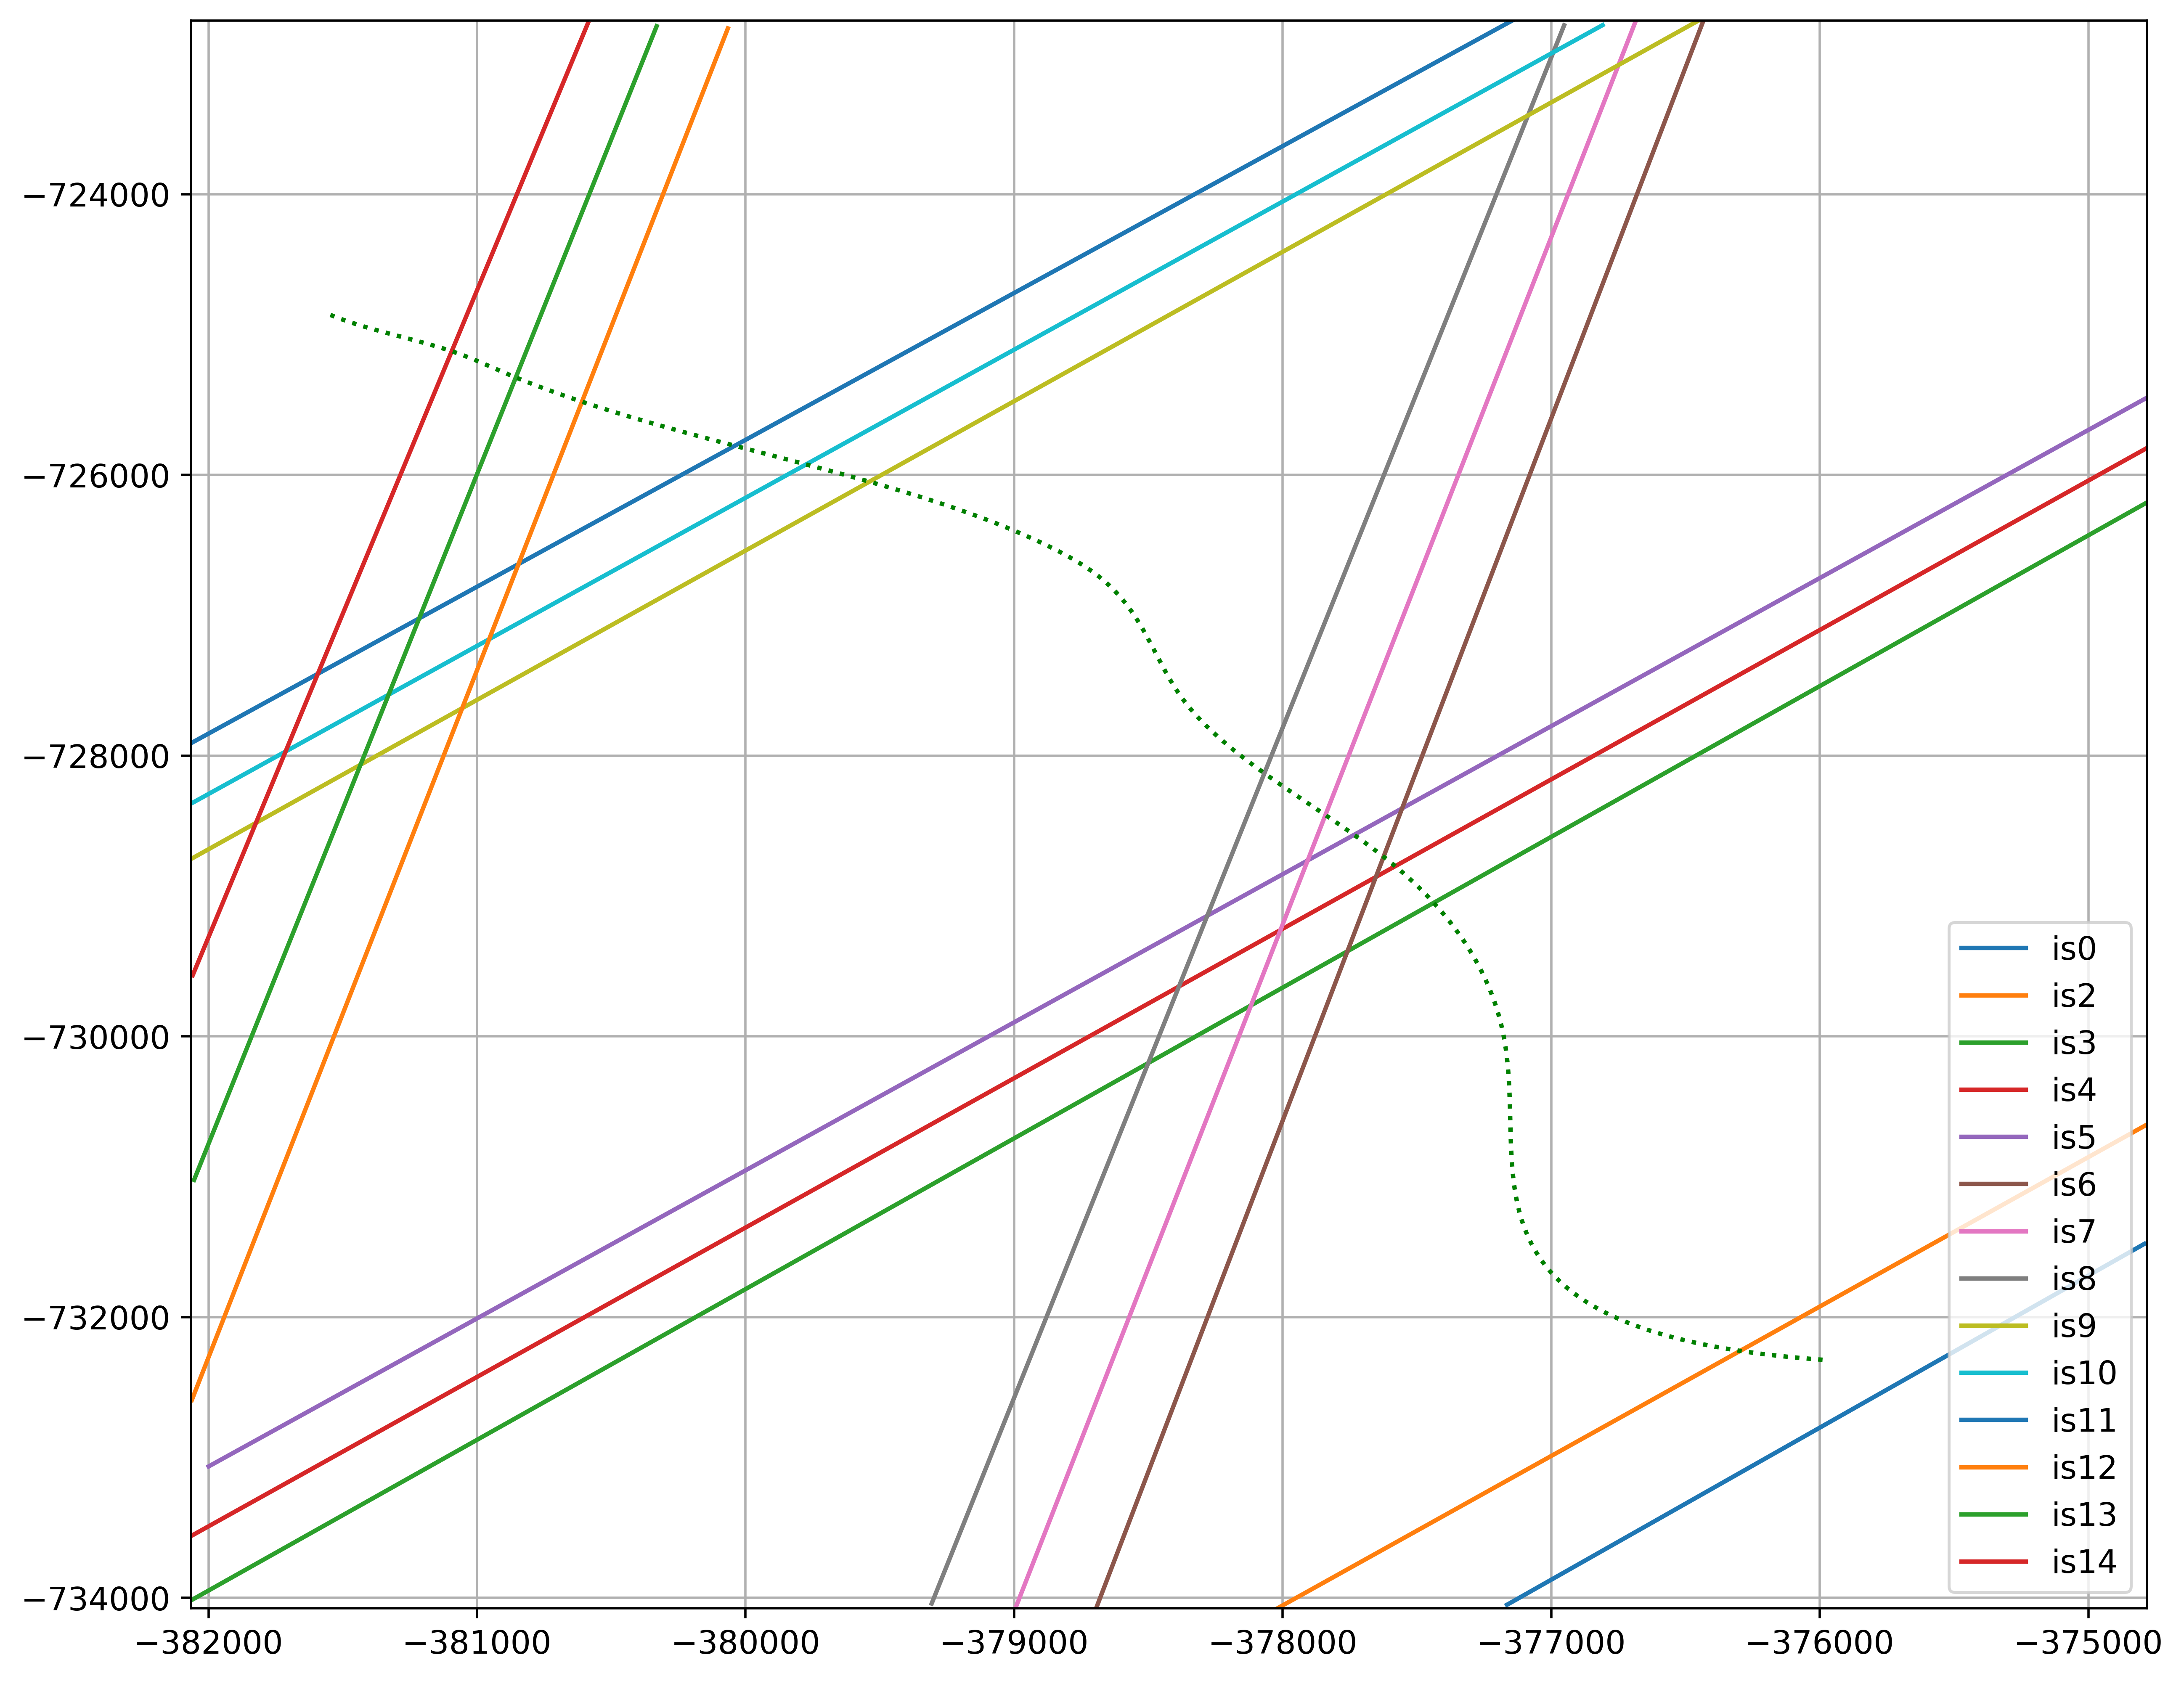

In [100]:
ds.plot_icesat_lines_map()


In [126]:
ds.gda.referencegroundtrack.unique()

array([ 114,  175,  349,  410,  617,  852, 1059, 1120, 1294, 1355])

In [133]:
ds.gda.cycle_number.unique()

array([3, 4, 5, 6, 7, 8, 9])

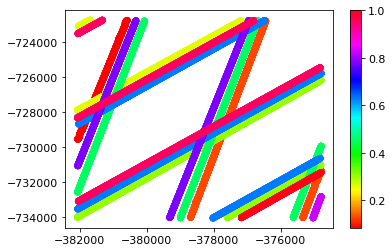

In [131]:
plt.scatter(ds.gda.x,ds.gda.y,cmap='hsv',c=ds.gda.referencegroundtrack/1355)
plt.colorbar()

In [120]:
ds.gda.referencegroundtrack.tolist()[i]

114

In [114]:
ds.gda.x[0]

KeyError: 0

In [14]:
ds.getdata_alllines(buff=10)

icesat_line_number    0     2      3      4      5      6      7      8   \
cycle_number                                                               
3                   63.0  82.0  186.0  186.0  183.0  197.0  201.0  202.0   
4                   62.0  82.0    1.0  184.0  181.0    2.0  200.0    3.0   
5                    1.0   1.0  185.0    1.0  181.0    8.0  200.0    2.0   
6                   61.0  81.0  170.0  183.0  180.0    2.0    3.0    4.0   
7                    2.0   1.0  185.0    2.0  182.0  196.0  110.0  200.0   
8                    1.0  82.0  185.0  185.0  182.0   77.0  201.0  202.0   
9                    NaN   NaN    NaN    NaN    NaN    NaN    NaN    NaN   

icesat_line_number     9      10     11     12     13    14  
cycle_number                                                 
3                   144.0  135.0  118.0  173.0  148.0  96.0  
4                   142.0  133.0    1.0  172.0    2.0   2.0  
5                     2.0  134.0  117.0  173.0    2.0  92.0  
6    

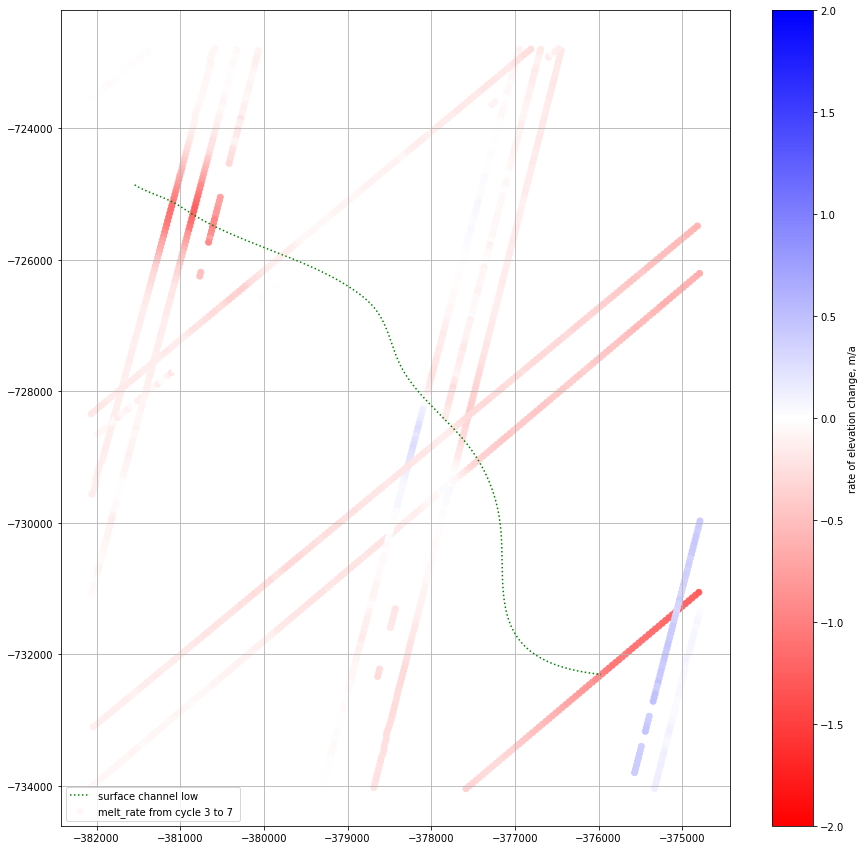

In [15]:
ds.plot_dhdt_map(cycle_number_from=3,cycle_number_till=7,vmin=-2,vmax=2)

In [16]:
ds.dadh['dates'] = [ts.date() for ts in ds.dadh.utc_time]
ds.dadh.dates.unique()

array([datetime.date(2019, 4, 5), datetime.date(2019, 4, 9),
       datetime.date(2019, 4, 21), datetime.date(2019, 4, 25),
       datetime.date(2019, 5, 8), datetime.date(2019, 5, 24),
       datetime.date(2019, 6, 6), NaT, datetime.date(2019, 6, 22),
       datetime.date(2019, 6, 26)], dtype=object)

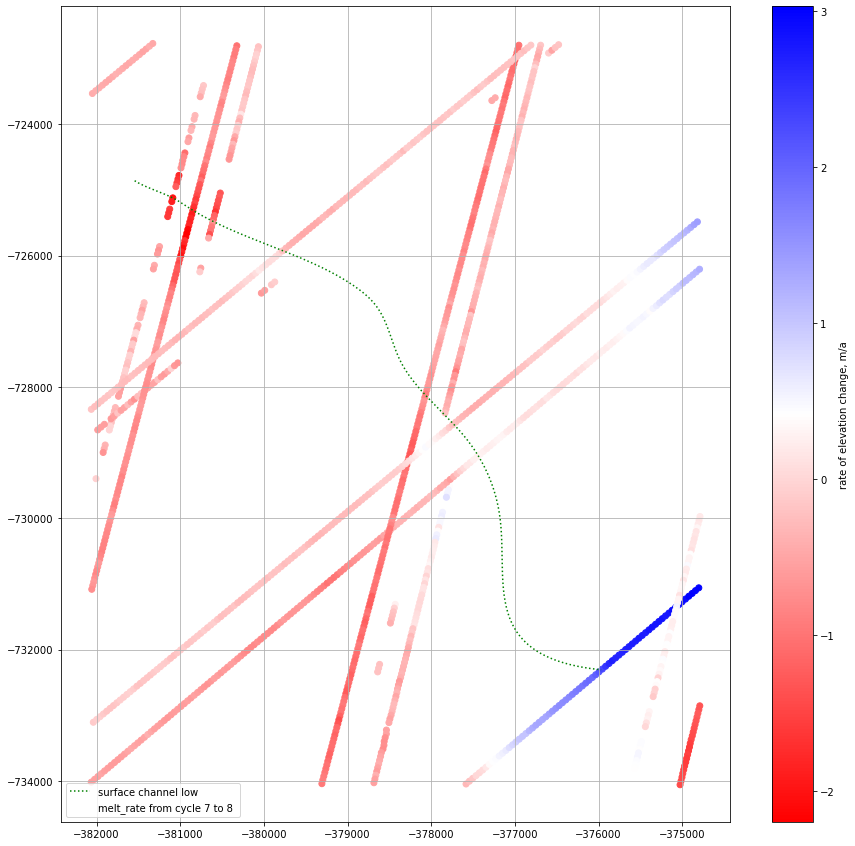

In [17]:
ds.plot_dhdt_map(cycle_number_from=7,cycle_number_till=8)

Index(['ref_pt', 'cycle_number', 'h_corr', 'utc_time', 'h_corr_sigma',
       'delta_time', 'latitude', 'longitude', 'referencegroundtrack', 'x', 'y',
       'geometry'],
      dtype='object')

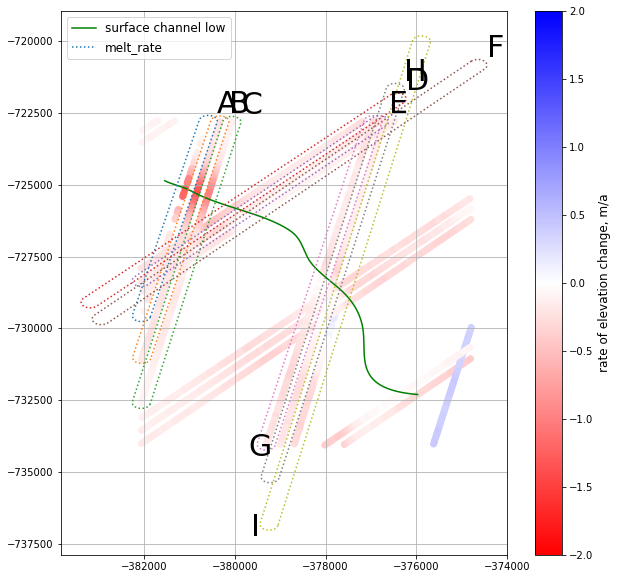

In [13]:
ds.plot_multiple_dhdt_crosssection_map(cycle_number_from=3,cycle_number_till=8,
                                       icesat_lines = [[14,'up'],[13,'up'],[12,'up'],[11,'up'],[10,'up'],[9,'up'],[8,'down'],
                                                       [7,'up'],[6,'down']],
                                      buff=200,vmin=-2.0,vmax=2.0)

# icesat2_a
## modify this plot fit for the paper

In [60]:
letters_placement = [[-381.0, -724],
                     [-380.7, -724.1],
                     [-380.4, -724.2],
                     [-378.4, -724],
                     [-378.1, -724.1],
                     [-377.8, -724.2],
                     [-377.3, -724],
                     [-377, -724.1],
                     [-376.7, -724.2]
                    ]
yticks = (np.linspace(-734000,-722000,4)/1000).astype(int)
xticks = (np.linspace(-382000,-376000,4)/1000).astype(int)

In [61]:
xmin, xmax, ymin, ymax = -382700, -374781.9, -734075.1, -721770.2

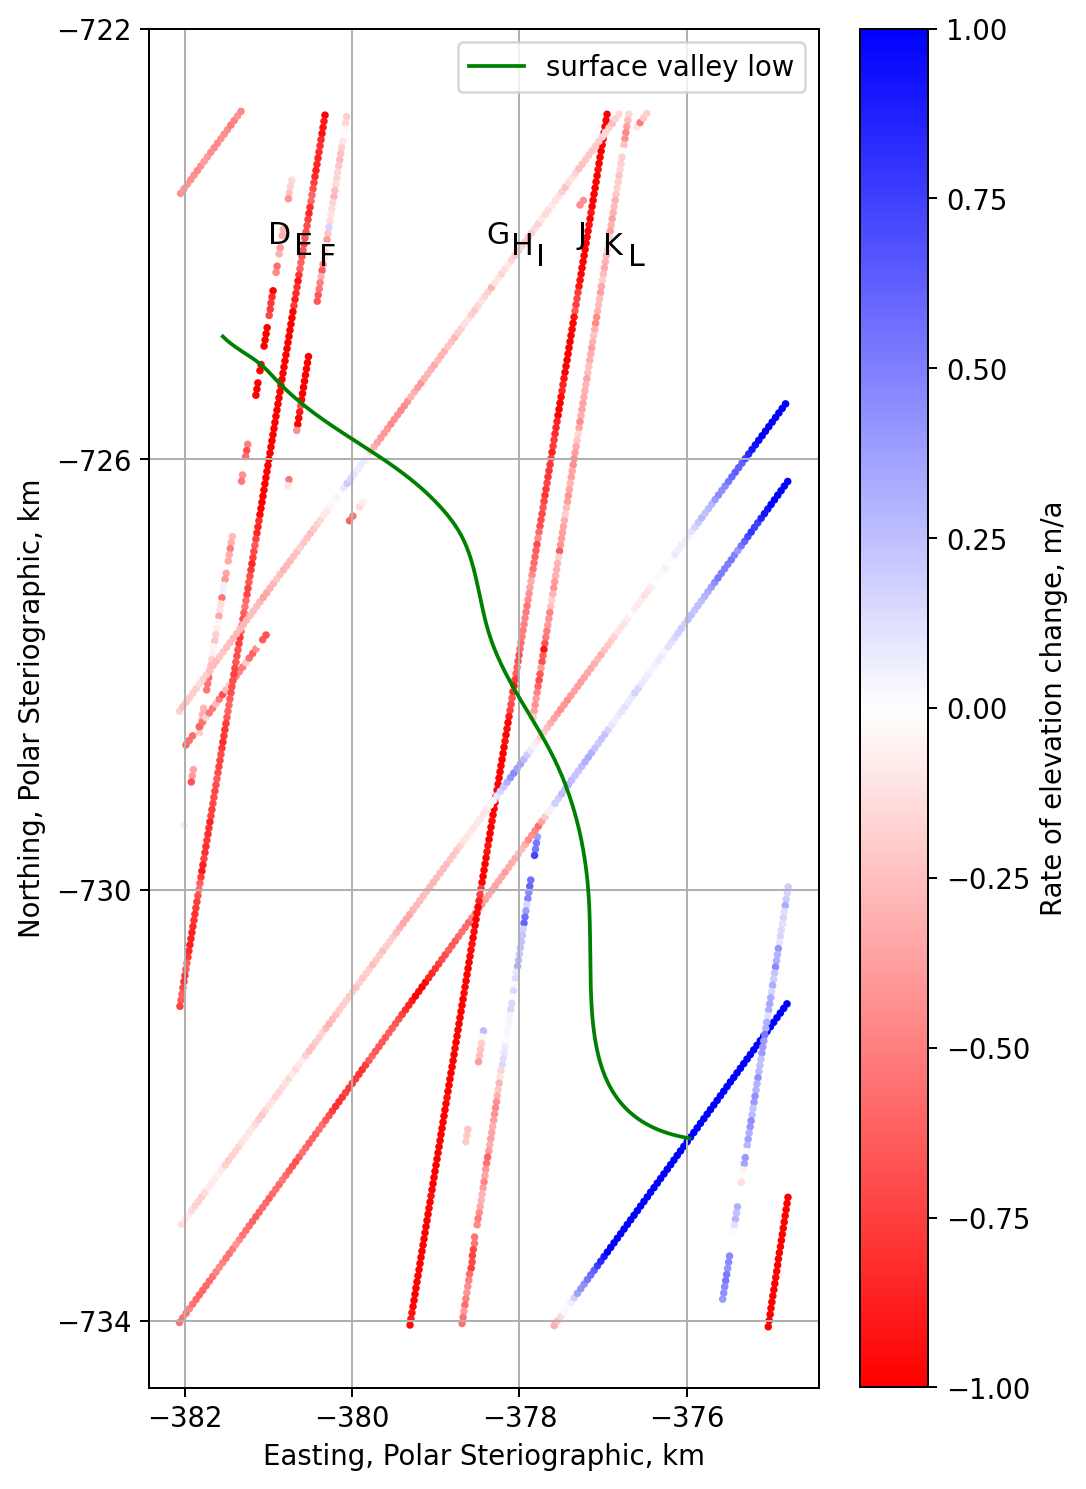

In [62]:
plt.figure(figsize=[6,10],dpi=180)

font = {'size'   : 11}
mpl.rc('font', **font)

plt.scatter(ds.dadh.x/1000,ds.dadh.y/1000,c=ds.dadh.dhdt, vmin=-1,vmax=1,cmap='bwr_r',s=4)
plt.plot(ds.channel_mid.geometry.x/1000,ds.channel_mid.geometry.y/1000,'g-')
i=65+3
for x,y in letters_placement:
    plt.text(x,y,chr(i),size=12)
    i += 1
plt.legend(['surface valley low'])
cb = plt.colorbar()
cb.set_label('Rate of elevation change, m/a')
plt.xlabel('Easting, Polar Steriographic, km')
plt.ylabel('Northing, Polar Steriographic, km')
plt.xticks(xticks)
plt.yticks(yticks)
plt.grid()
# plt.xlim([xmin/1000,xmax/1000])

# plt.ylim([ymin/1000,ymax/1000])

plt.savefig('/Users/home/whitefar/ASSIGNMENTS-PUBLICATIONS-TALKS/channel_data_writeup/PLOTS/icesat2_a.png')
plt.show()

-376951.9647800922 -722796.4965373842
-379307.12451871374 -734040.5876975255


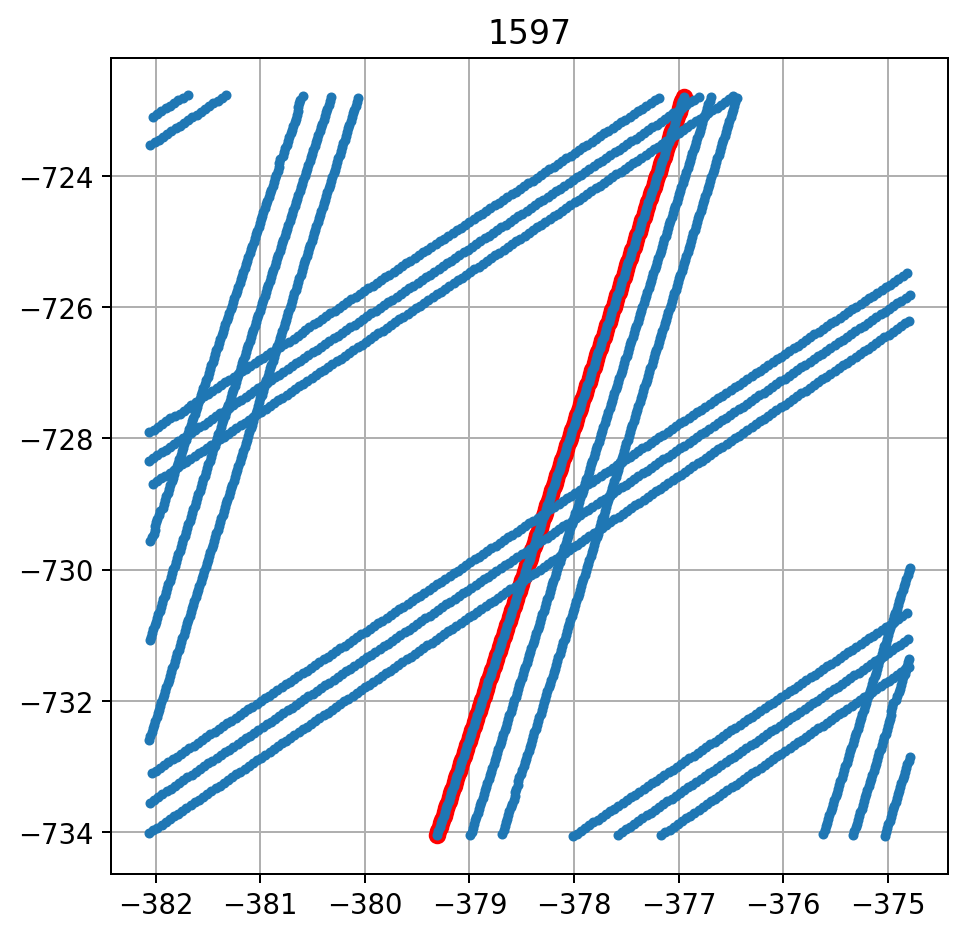

In [63]:
plt.figure(figsize=[6,6],dpi=180)

i=1597

j=i+198

print(ds.dadh.x.iloc[i],ds.dadh.y.iloc[i])
print(ds.dadh.x.iloc[j-1],ds.dadh.y.iloc[j-1])


plt.plot(ds.dadh.x.iloc[i:j]/1000,ds.dadh.y.iloc[i:j]/1000,'ro')
plt.plot(ds.dadh.x/1000,ds.dadh.y/1000,'.')

plt.grid()
plt.title(f'{i}')
plt.show()


In [64]:
# ds.plot_multiple_dhdt_crosssection(cycle_number_from=3,cycle_number_till=8,                                    
#                                    icesat_lines = [[14,'up'],[13,'down'],[12,'up'],[11,'up'],[10,'up'],[9,'up'],[8,'up'],
#                                                        [7,'down'],[6,'down']])

# icesat2_b
## NOW modify this plot fit for the paper

In [65]:
cycle_number_from=3
cycle_number_till=8
icesat_lines = [[14,'up'],[13,'down'],[12,'up'],[11,'up'],[10,'up'],[9,'up'],[8,'up'],[7,'down'],[6,'up']]

In [66]:
 # if data over that line hasnt been found using getdataline or all_lines, find it.
dict_entrys = [f'is{icesat_line_number[0]}' for icesat_line_number in icesat_lines]
icesat_line_numbers = [b[0] for b in icesat_lines]

gda_line_diffs = []
point_midchannels = []
linestrings = []
# for each line do the cross section diff
for icesat_line_number in icesat_line_numbers:
    # if data over that line hasnt been found using getdataline or all_lines, find it.
    dict_entry = f'is{icesat_line_number}'
    try:
        gda_line = ds.gda_lines[dict_entry]
    except KeyError:
        ds.getdata_line(icesat_line_number)
        gda_line = ds.gda_lines[dict_entry]

    for cycle in [cycle_number_from,cycle_number_till]:
        try:
            gda_line.dropna(axis='index',subset=['h_corr']).cycle_number.value_counts().loc[cycle]
        except KeyError:
            print(f'There is no data for line {icesat_line_number}, cycle {cycle}')
            continue
    linestrings.append(LineString(gda_line.geometry.tolist()))
    
         

   # This dataframe has h_corr from cycle_number_from, and dhdt. Times are from cycle_number_from
    gda_line_diff = gpd.GeoDataFrame( gda_line[gda_line.cycle_number==cycle_number_from],geometry=gda_line.geometry ).reset_index(drop=True)
    gda_line_diff.rename(columns={"h_corr": f"h_corr_cycle_{cycle_number_from}"}, inplace=True)
    gda_line_diff[f"h_corr_cycle_{cycle_number_till}"] = gda_line[gda_line.cycle_number==cycle_number_till].h_corr.reset_index(drop=True)


    gda_line_diff['dh'] =- (gda_line[gda_line.cycle_number==cycle_number_from].h_corr.to_numpy() -
                          gda_line[gda_line.cycle_number==cycle_number_till].h_corr.to_numpy())

    #get distance from apex of channel
#     point_midchannel = np.array( LineString(gda_line.geometry.tolist()).intersection(LineString(ds.channel_mid.geometry.tolist())) ) 
#     if len(point_midchannel.shape)>1:
#         point_midchannel = np.mean(point_midchannel,axis=0)
    point_midchannel = gda_line_diff.geometry.iloc[gda_line_diff[f"h_corr_cycle_{cycle_number_till}"].idxmin()]
    point_0 = gda_line_diff.geometry.iloc[gda_line_diff.y.idxmax()]
    distance_alongline = np.array([point_0.distance(point) for point in gda_line_diff.geometry.tolist()]
                                 )
    point_0_to_midchan = point_0.distance(Point(point_midchannel))
    gda_line_diff['distance_frommid'] = distance_alongline - point_0_to_midchan   
    
    # get the time in years between data points
    gda_line_diff['dt'] = (gda_line[gda_line.cycle_number==cycle_number_till].utc_time.to_numpy()  - 
                      gda_line[gda_line.cycle_number==cycle_number_from].utc_time.to_numpy()  ) 
    gda_line_diff.dt = gda_line_diff.dt /  np.timedelta64(1, 'Y')

    gda_line_diff['dhdt'] = gda_line_diff['dh'].to_numpy()/gda_line_diff['dt'].to_numpy()

    gda_line_diffs.append(gda_line_diff)

    del gda_line_diff

In [67]:
mx

NameError: name 'mx' is not defined

In [68]:
yyticks

NameError: name 'yyticks' is not defined

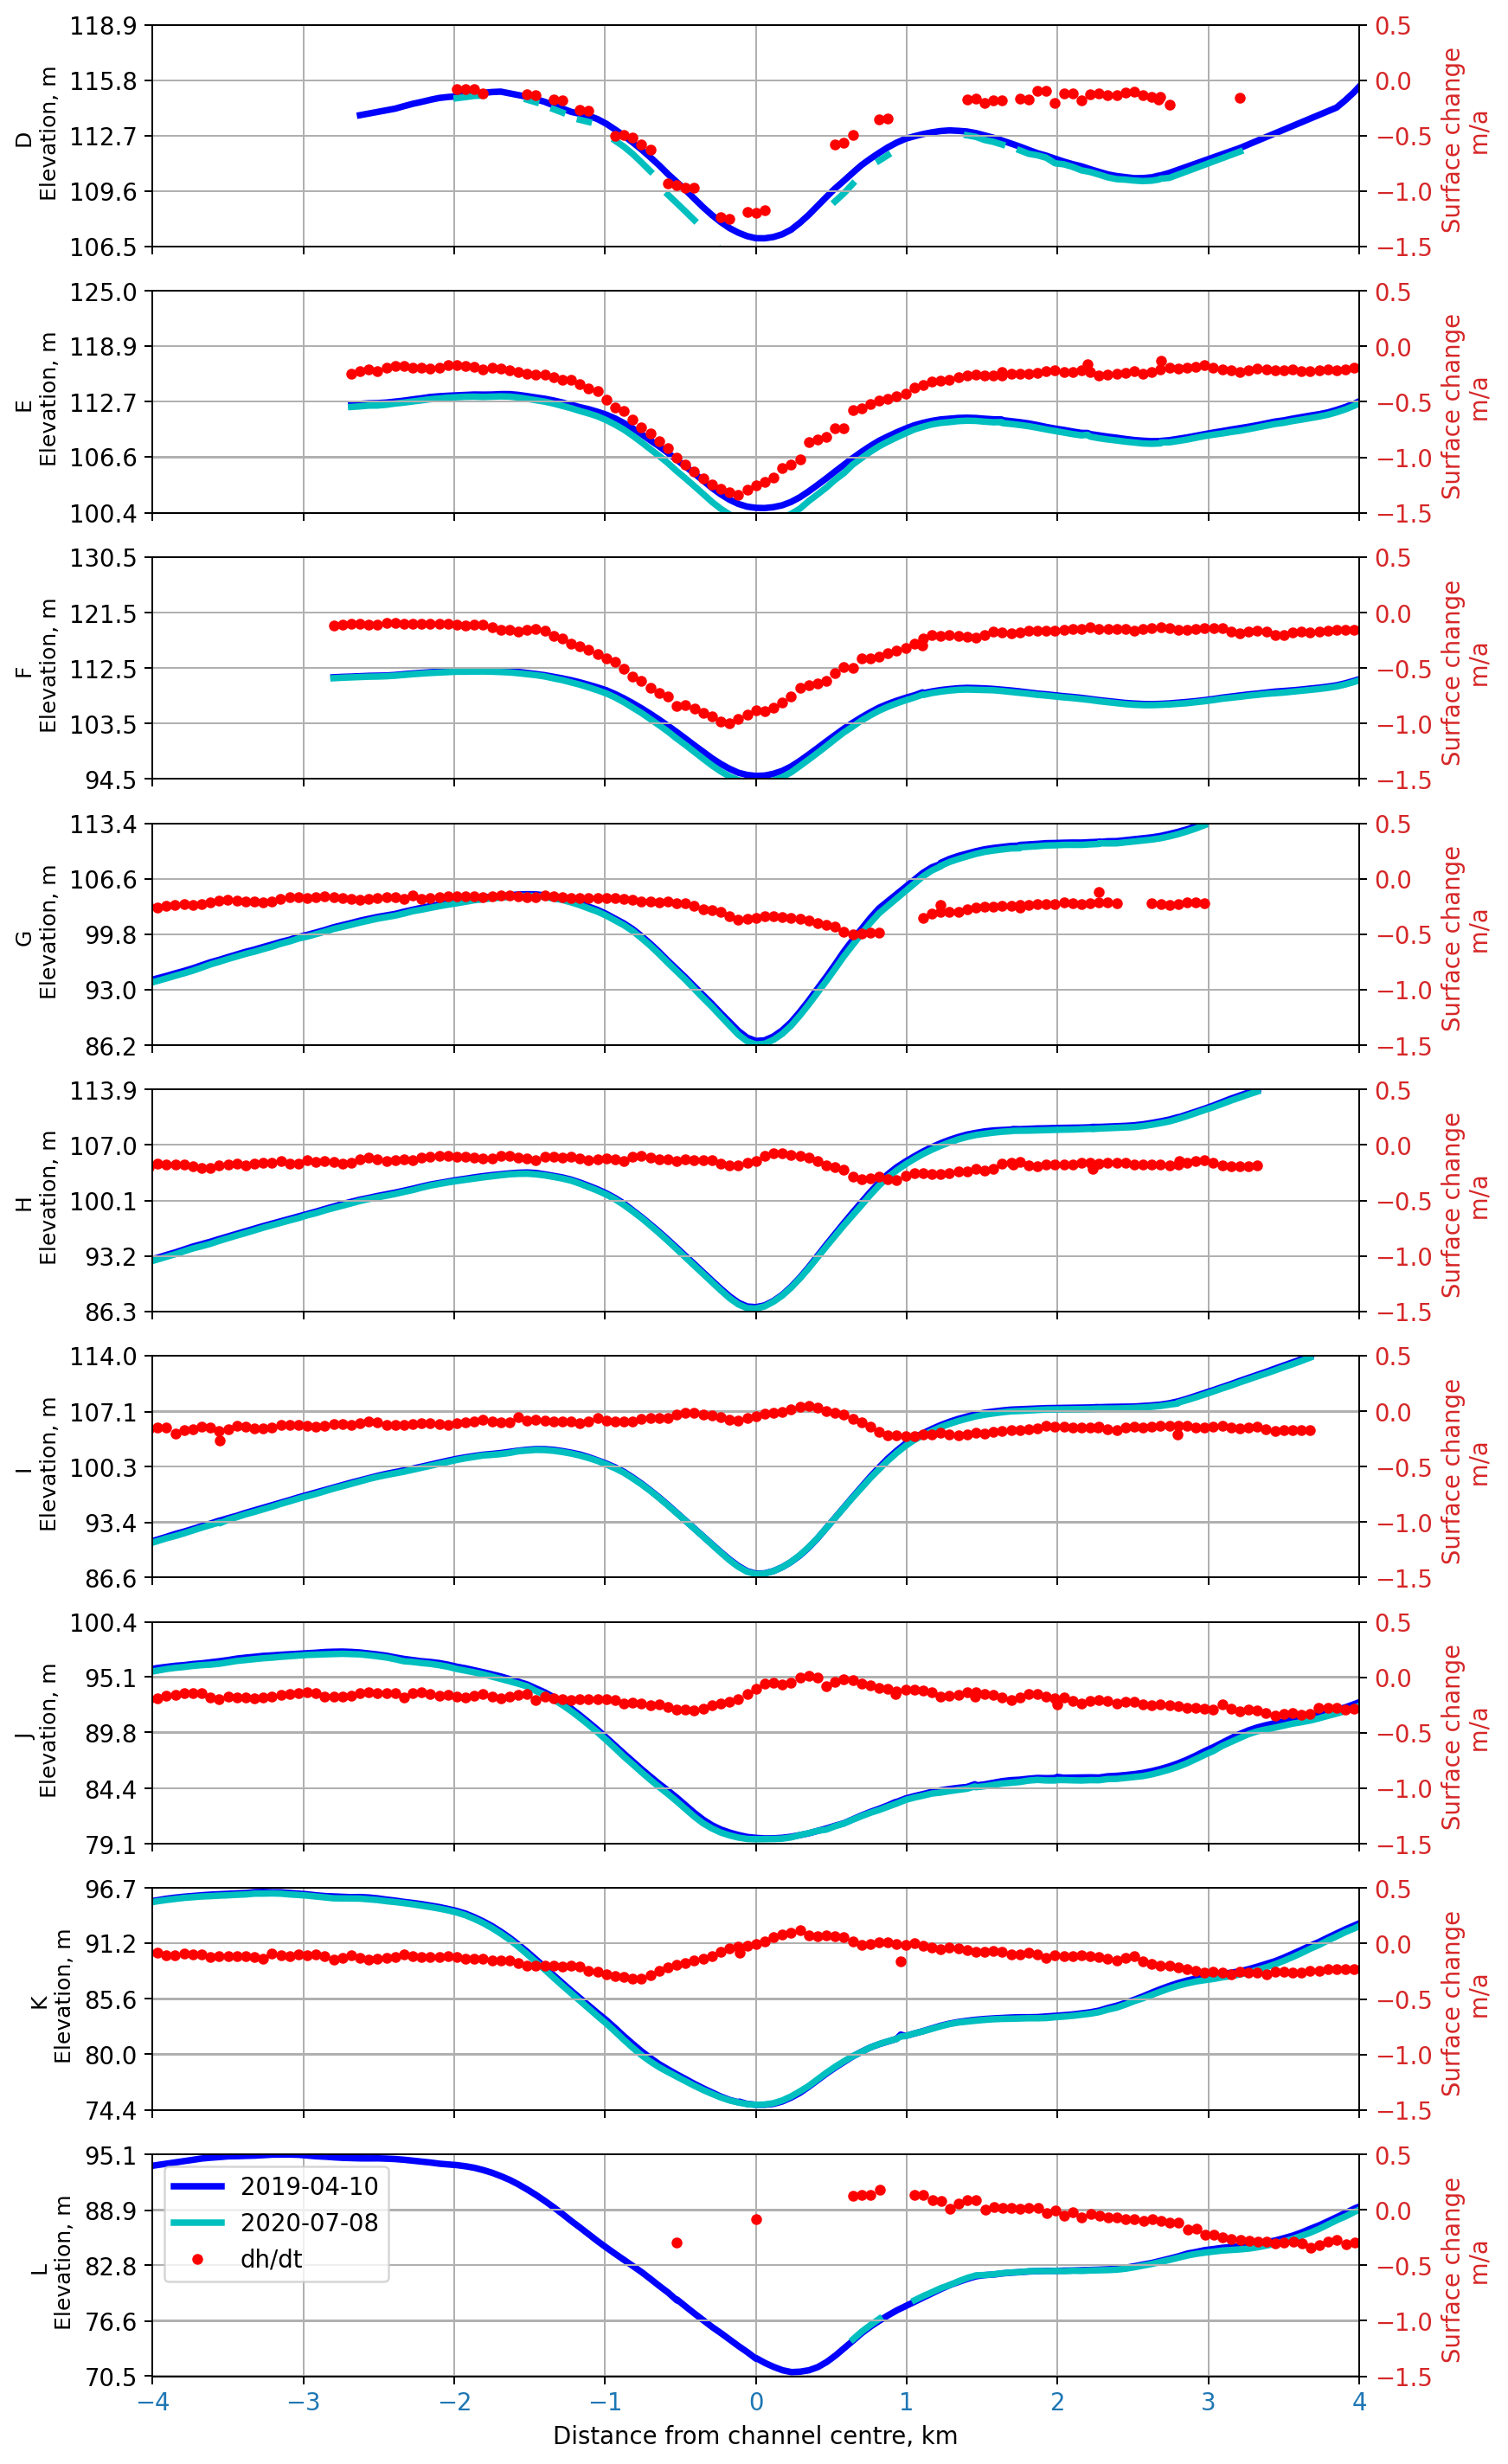

In [86]:
#do it better for papier
fig, ax = plt.subplots(n_plots,1,figsize=(10,20),dpi=180,sharex=True)

font = {'size'   : 11}
mpl.rc('font', **font)
j=0
i= 65+3
for ax1,gda_line_diff in zip(ax,gda_line_diffs):

    color = 'tab:blue'

    ax1.set_ylabel(f'{chr(i)} \n Elevation, m', color='k',fontsize=10)
    i += 1

    ax1.plot(gda_line_diff.sort_values(by ='distance_frommid' ).distance_frommid/1000,
             gda_line_diff.sort_values(by ='distance_frommid' )[f"h_corr_cycle_{cycle_number_from}"]+geoid_correction,'b-',
            label = f"{gda_line[gda_line.cycle_number==cycle_number_from].utc_time.mean().date()}",linewidth=3)

    ax1.plot(gda_line_diff.sort_values(by ='distance_frommid' ).distance_frommid/1000,
             gda_line_diff.sort_values(by ='distance_frommid' )[f"h_corr_cycle_{cycle_number_till}"]+geoid_correction,'c-',
            label = f"{gda_line[gda_line.cycle_number==cycle_number_till].utc_time.mean().date()}",linewidth=3)

    ax1.tick_params(axis='x', labelcolor=color)
#     ax1.set_xticks(yticks)
    mn = np.min(gda_line_diff.sort_values(by ='distance_frommid' )[f"h_corr_cycle_{cycle_number_from}"])+geoid_correction
    mx = np.max(gda_line_diff.sort_values(by ='distance_frommid' )[f"h_corr_cycle_{cycle_number_from}"])+geoid_correction
    yyticks = np.linspace(mn-0.5,mx,5).round(1)
    ax1.set_yticks(yyticks)
    ax1.set_ylim([yyticks[0],yyticks[-1]])
    ax1.set_xlim([-4,4])


    ax1.grid()
#     ax1.legend()

    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

    color = 'tab:red'
     # we already handled the x-label with ax1
    ax2.plot(gda_line_diff.sort_values(by ='distance_frommid' ).distance_frommid/1000,gda_line_diff.sort_values(by ='distance_frommid' ).dhdt,'ro', label='dh/dt',markersize=4)
#     ax2.vlines(point_midchannel[0]/1000,gda_line_diff.dhdt.min(),gda_line_diff.dhdt.max(),color='green',label='surface valley low')

    ax2.tick_params(axis='y', labelcolor=color)
    ax2.grid()
    ax2.set_ylabel('Surface change \n m/a', color=color)
    ytticks = np.linspace(-1.5,0.5,5)
    ax2.set_ylim([ytticks[0],ytticks[1]])
    ax2.set_yticks(ytticks)
#     ax2.invert_xaxis()

lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines1 + lines2, labels1 + labels2, loc=0)


ax1.set_xlabel('Distance from channel centre, km')

plt.savefig('/Users/home/whitefar/ASSIGNMENTS-PUBLICATIONS-TALKS/channel_data_writeup/PLOTS/icesat2_b.png')
plt.show()

In [70]:
#do it better for papier
fig, ax = plt.subplots(n_plots,1,figsize=(10,20),dpi=180,sharex=True)

font = {'size'   : 11}
mpl.rc('font', **font)
j=0
i= 65+3
for ax1,gda_line_diff in zip(ax,gda_line_diffs):

    color = 'tab:blue'

    ax1.set_ylabel(f'{chr(i)} \n Elevation m', color='k',fontsize=10)
    i += 1

    ax1.plot(gda_line_diff.sort_values(by ='distance_frommid' ).distance_frommid/1000,
             gda_line_diff.sort_values(by ='distance_frommid' )[f"h_corr_cycle_{cycle_number_from}"]+geoid_correction,'b-',
            label = f"{gda_line[gda_line.cycle_number==cycle_number_from].utc_time.mean().date()}",linewidth=1)

    ax1.plot(gda_line_diff.sort_values(by ='distance_frommid' ).distance_frommid/1000,
             gda_line_diff.sort_values(by ='distance_frommid' )[f"h_corr_cycle_{cycle_number_till}"]+geoid_correction,'c-',
            label = f"{gda_line[gda_line.cycle_number==cycle_number_till].utc_time.mean().date()}",linewidth=1)

    ax1.tick_params(axis='x', labelcolor=color)
#     ax1.set_xticks(yticks)
    mn = np.min(gda_line_diff.sort_values(by ='distance_frommid' )[f"h_corr_cycle_{cycle_number_from}"])+geoid_correction
    mx = np.max(gda_line_diff.sort_values(by ='distance_frommid' )[f"h_corr_cycle_{cycle_number_from}"])+geoid_correction
    yyticks = np.linspace(mn-0.5,mx,5).round(1)
#     ax1.set_yticks(yyticks)
#     ax1.set_ylim([yyticks[0],yyticks[-1]])
    ax1.set_xlim([-4,4])


    ax1.grid()
#     ax1.legend()

    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

    color = 'tab:red'
     # we already handled the x-label with ax1
    ax2.plot(gda_line_diff.sort_values(by ='distance_frommid' ).distance_frommid/1000,gda_line_diff.sort_values(by ='distance_frommid' ).dhdt,'ro', label='dh/dt',markersize=4)
#     ax2.vlines(point_midchannel[0]/1000,gda_line_diff.dhdt.min(),gda_line_diff.dhdt.max(),color='green',label='surface valley low')

    ax2.tick_params(axis='y', labelcolor=color)
    ax2.grid()
    ax2.set_ylabel('Surface change, m/a', color=color)
    ytticks = np.linspace(-1.5,0.5,5)
#     ax2.set_ylim([ytticks[0],ytticks[1]])
#     ax2.set_yticks(ytticks)
#     ax2.invert_xaxis()

lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines1 + lines2, labels1 + labels2, loc=0)


ax1.set_xlabel('Distance from channel centre, km')

# plt.savefig('/Users/home/whitefar/ASSIGNMENTS-PUBLICATIONS-TALKS/channel_data_writeup/PLOTS/icesat2_b.png')
plt.show()

NameError: name 'n_plots' is not defined

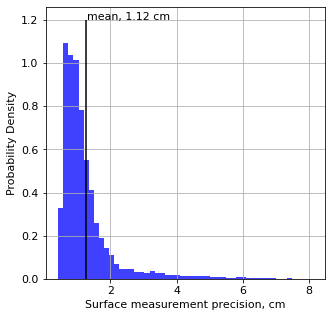

In [71]:
# bins_s = np.arange(-3,2,0.2)

j=0
plt.figure(figsize=(5,5))
n, bins, patches = plt.hist(ds.gda.h_corr_sigma*100,50, density=True,  facecolor='blue', alpha=0.75,label='7 hours')
plt.vlines(ds.gda.h_corr_sigma.mean()*100,0,1.20,color='black')
plt.text(1.3,1.2,f'mean, 1.12 cm')
# ax[j].vlines(np.mean(-afs[0].meltRate),0,3,color='black',label='Mean')
# ax[j].legend()
# ax[j].set_xlim([-2,4])
# ax[j].grid()
plt.ylabel('Probability Density')
plt.xlabel('Surface measurement precision, cm')
plt.grid()

In [72]:
ds.gda.h_corr_sigma.mean()

0.012472463

In [73]:
gda_line_diffs[0].keys()

Index(['ref_pt', 'cycle_number', 'h_corr_cycle_3', 'utc_time', 'h_corr_sigma',
       'delta_time', 'latitude', 'longitude', 'referencegroundtrack', 'x', 'y',
       'geometry', 'h_corr_cycle_8', 'dh', 'distance_frommid', 'dt', 'dhdt'],
      dtype='object')

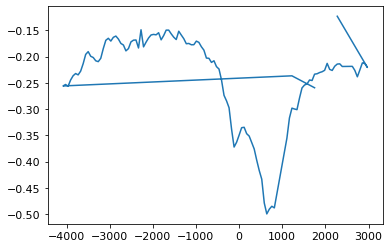

In [74]:
plt.plot(gda_line_diffs[3].distance_frommid,gda_line_diffs[3].dhdt)

In [75]:

for i,gda_line_diff in enumerate(gda_line_diffs):

    

IndentationError: expected an indented block (3246388379.py, line 3)

In [76]:
# distance_frommid

In [77]:
geoid_correction = 47

In [78]:
n_plots = len(icesat_lines)
n_plots

9

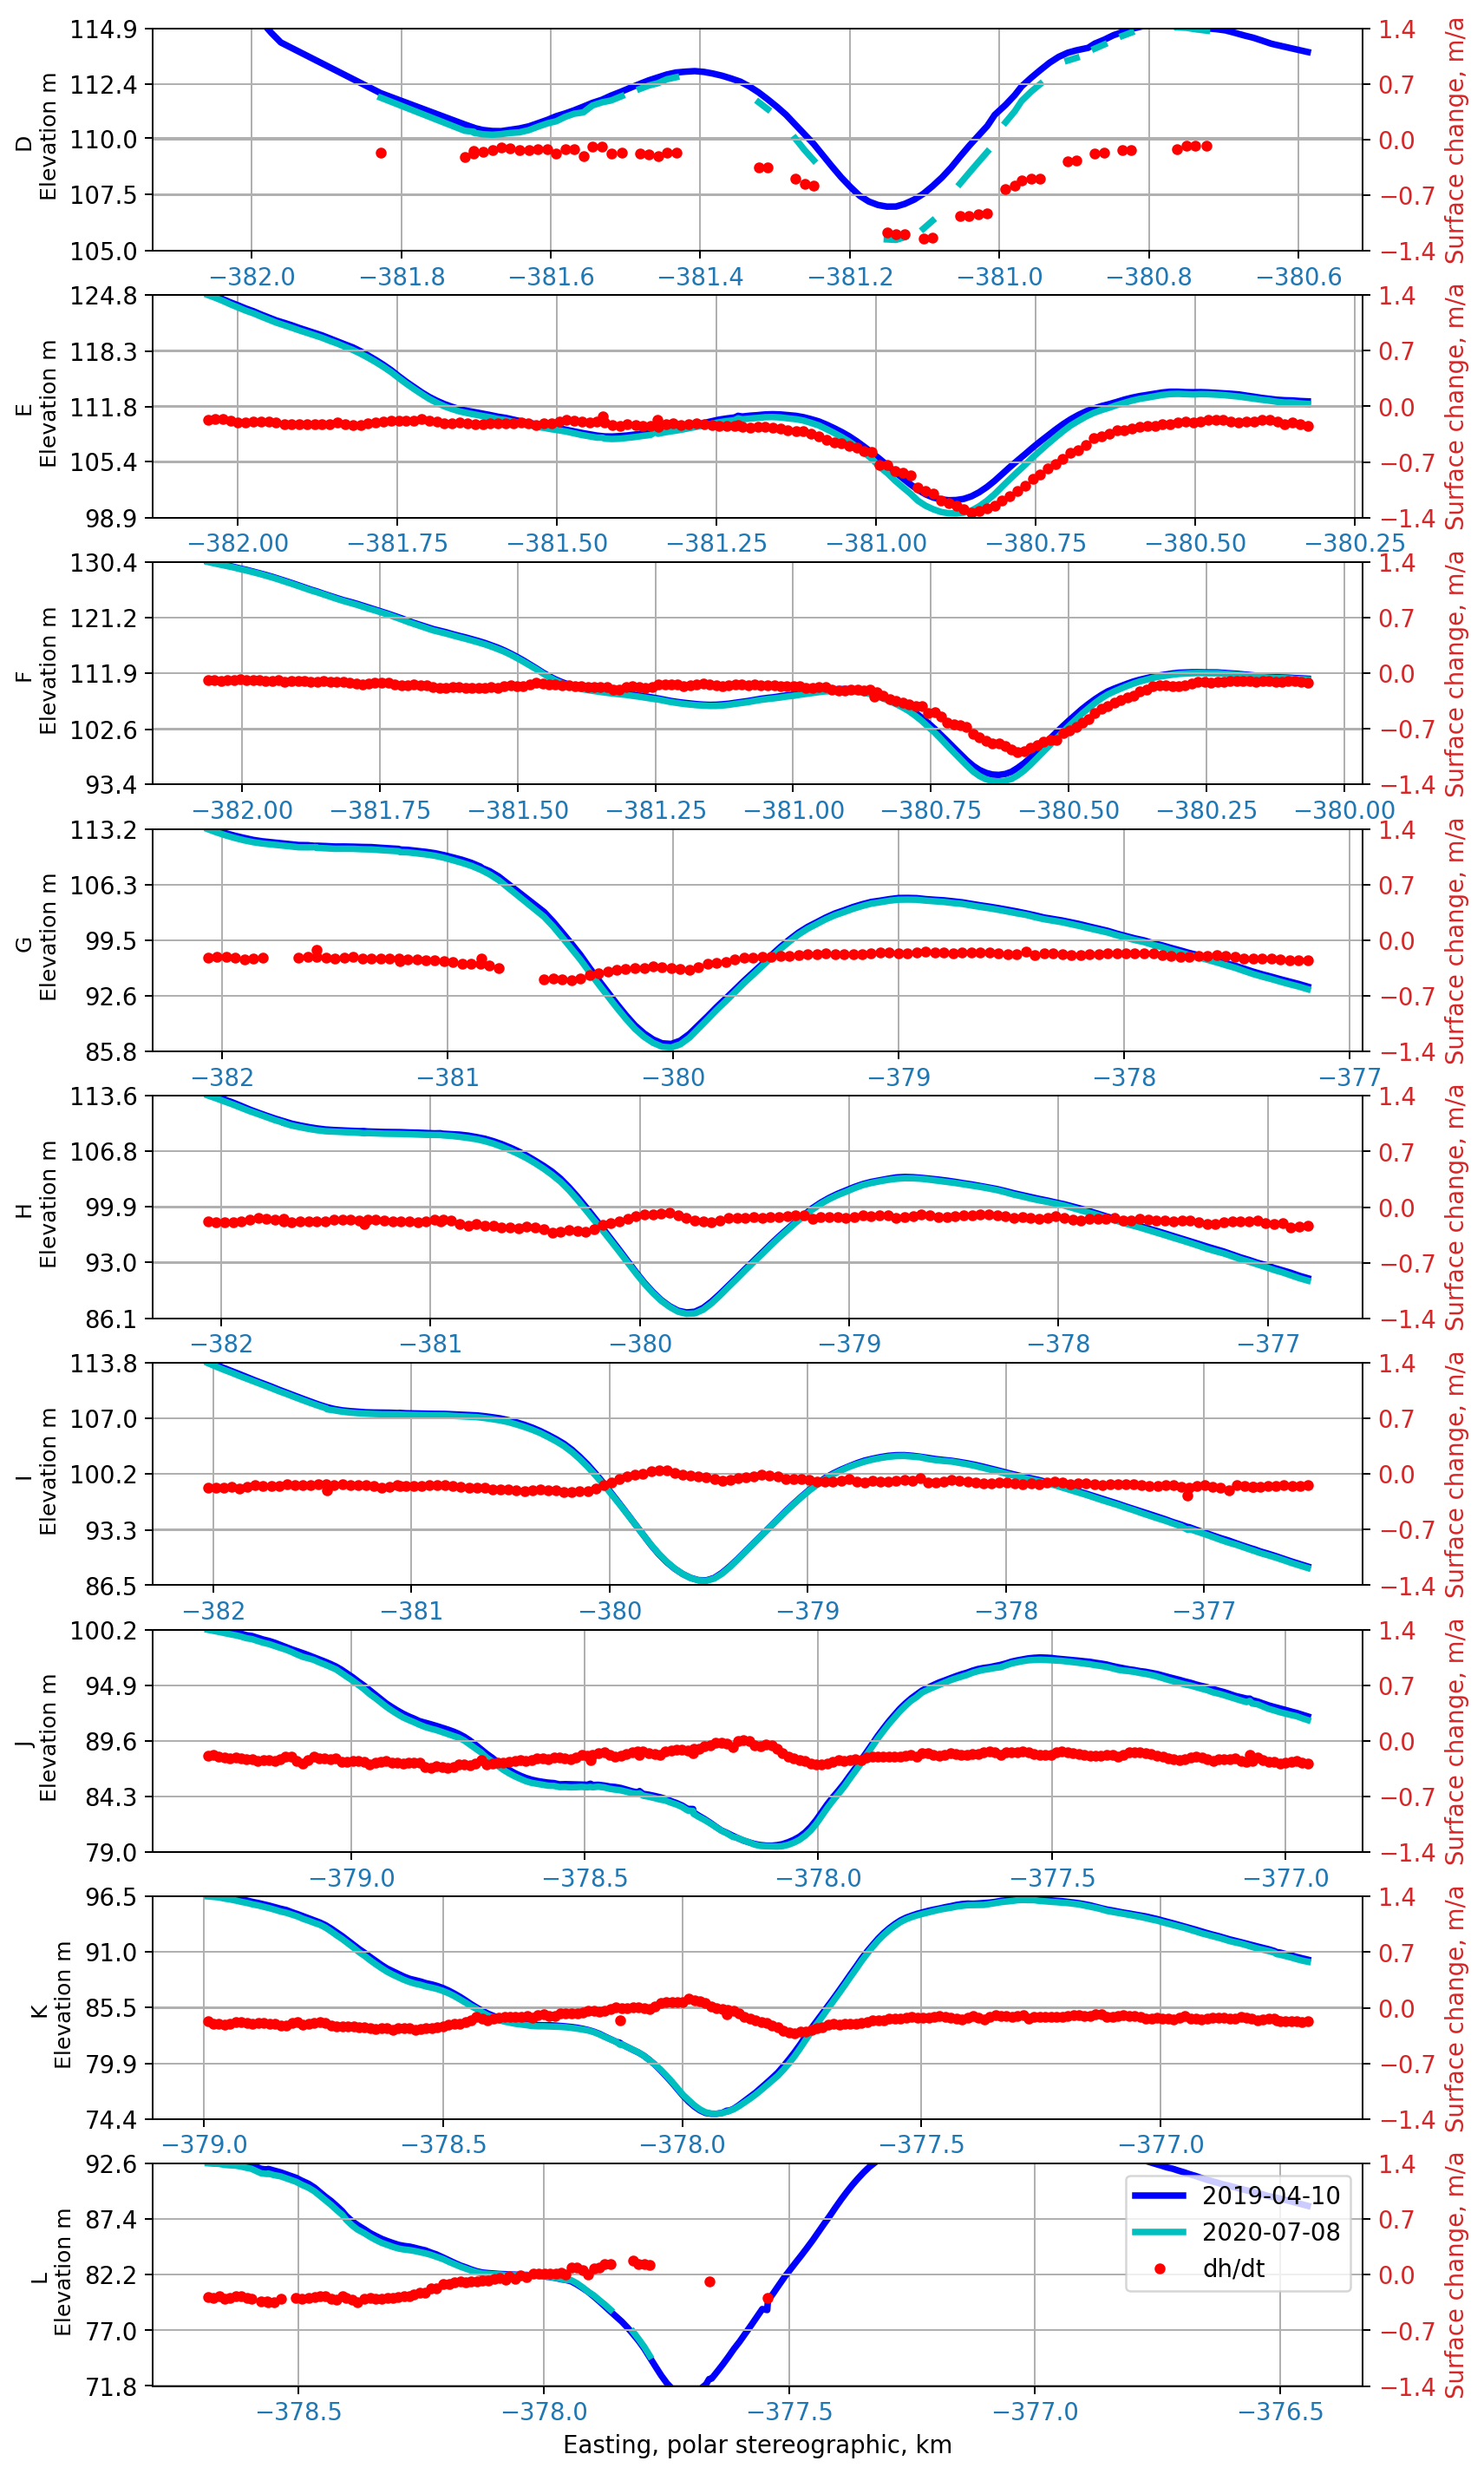

In [79]:
fig, ax = plt.subplots(n_plots,1,figsize=(10,20),dpi=180)

font = {'size'   : 11}
mpl.rc('font', **font)
# j=0
i= 65+3
for ax1,gda_line_diff in zip(ax,gda_line_diffs):

    color = 'tab:blue'

    ax1.set_ylabel(f'{chr(i)} \n Elevation m', color='k',fontsize=10)
    i += 1

    ax1.plot(gda_line_diff.sort_values(by ='x' ).x/1000,
             gda_line_diff.sort_values(by ='x' )[f"h_corr_cycle_{cycle_number_from}"]+geoid_correction,'b-',
            label = f"{gda_line[gda_line.cycle_number==cycle_number_from].utc_time.mean().date()}",linewidth=3)

    ax1.plot(gda_line_diff.sort_values(by ='x' ).x/1000,
             gda_line_diff.sort_values(by ='x' )[f"h_corr_cycle_{cycle_number_till}"]+geoid_correction,'c-',
            label = f"{gda_line[gda_line.cycle_number==cycle_number_till].utc_time.mean().date()}",linewidth=3)

    ax1.tick_params(axis='x', labelcolor=color)
#     ax1.set_xticks(yticks)
    mn = np.min(gda_line_diff.sort_values(by ='x' )[f"h_corr_cycle_{cycle_number_till}"])+geoid_correction
    mx = np.max(gda_line_diff.sort_values(by ='x' )[f"h_corr_cycle_{cycle_number_till}"])+geoid_correction
    yyticks = np.linspace(mn-0.5,mx,5).round(1)
    ax1.set_yticks(yyticks)
    ax1.set_ylim([yyticks[0],yyticks[-1]])


    ax1.grid()
#     ax1.legend()

    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

    color = 'tab:red'
     # we already handled the x-label with ax1
    ax2.plot(gda_line_diff.x/1000,gda_line_diff.dhdt,'ro', label='dh/dt',markersize=4)
#     ax2.vlines(point_midchannel[0]/1000,gda_line_diff.dhdt.min(),gda_line_diff.dhdt.max(),color='green',label='surface valley low')

    ax2.tick_params(axis='y', labelcolor=color)
    ax2.grid()
    ax2.set_ylabel('Surface change, m/a', color=color)
    ytticks = np.linspace(-1.4,1.4,5)
    ax2.set_ylim([ytticks[0],ytticks[1]])
    ax2.set_yticks(ytticks)
    
#     ax2.set_xlim([xlim[j,0],xlim_1[j,1]])
    
#     j+=1

lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines1 + lines2, labels1 + labels2, loc=0)


ax1.set_xlabel('Easting, polar stereographic, km')

# plt.savefig('/Users/home/whitefar/ASSIGNMENTS-PUBLICATIONS-TALKS/channel_data_writeup/PLOTS/icesat2_b.png')
plt.show()

# true left and right

In [80]:
gda_line_diffs[0].keys()

Index(['ref_pt', 'cycle_number', 'h_corr_cycle_3', 'utc_time', 'h_corr_sigma',
       'delta_time', 'latitude', 'longitude', 'referencegroundtrack', 'x', 'y',
       'geometry', 'h_corr_cycle_8', 'dh', 'distance_frommid', 'dt', 'dhdt'],
      dtype='object')

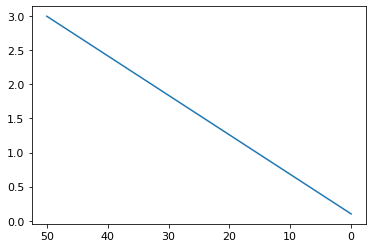

In [81]:
fig, ax = plt.subplots(1,1)
ax.plot(np.linspace(0,50),np.linspace(0.1,3))
ax.invert_xaxis()

AttributeError: module 'matplotlib.pyplot' has no attribute 'invert_xaxis'

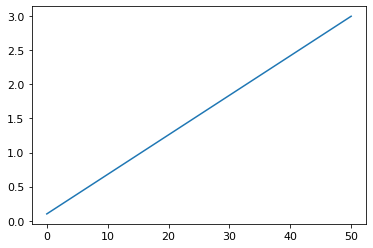

In [82]:
plt.plot(np.linspace(0,50),np.linspace(0.1,3))
# plt.xlim([50,0])
plt.invert_xaxis()

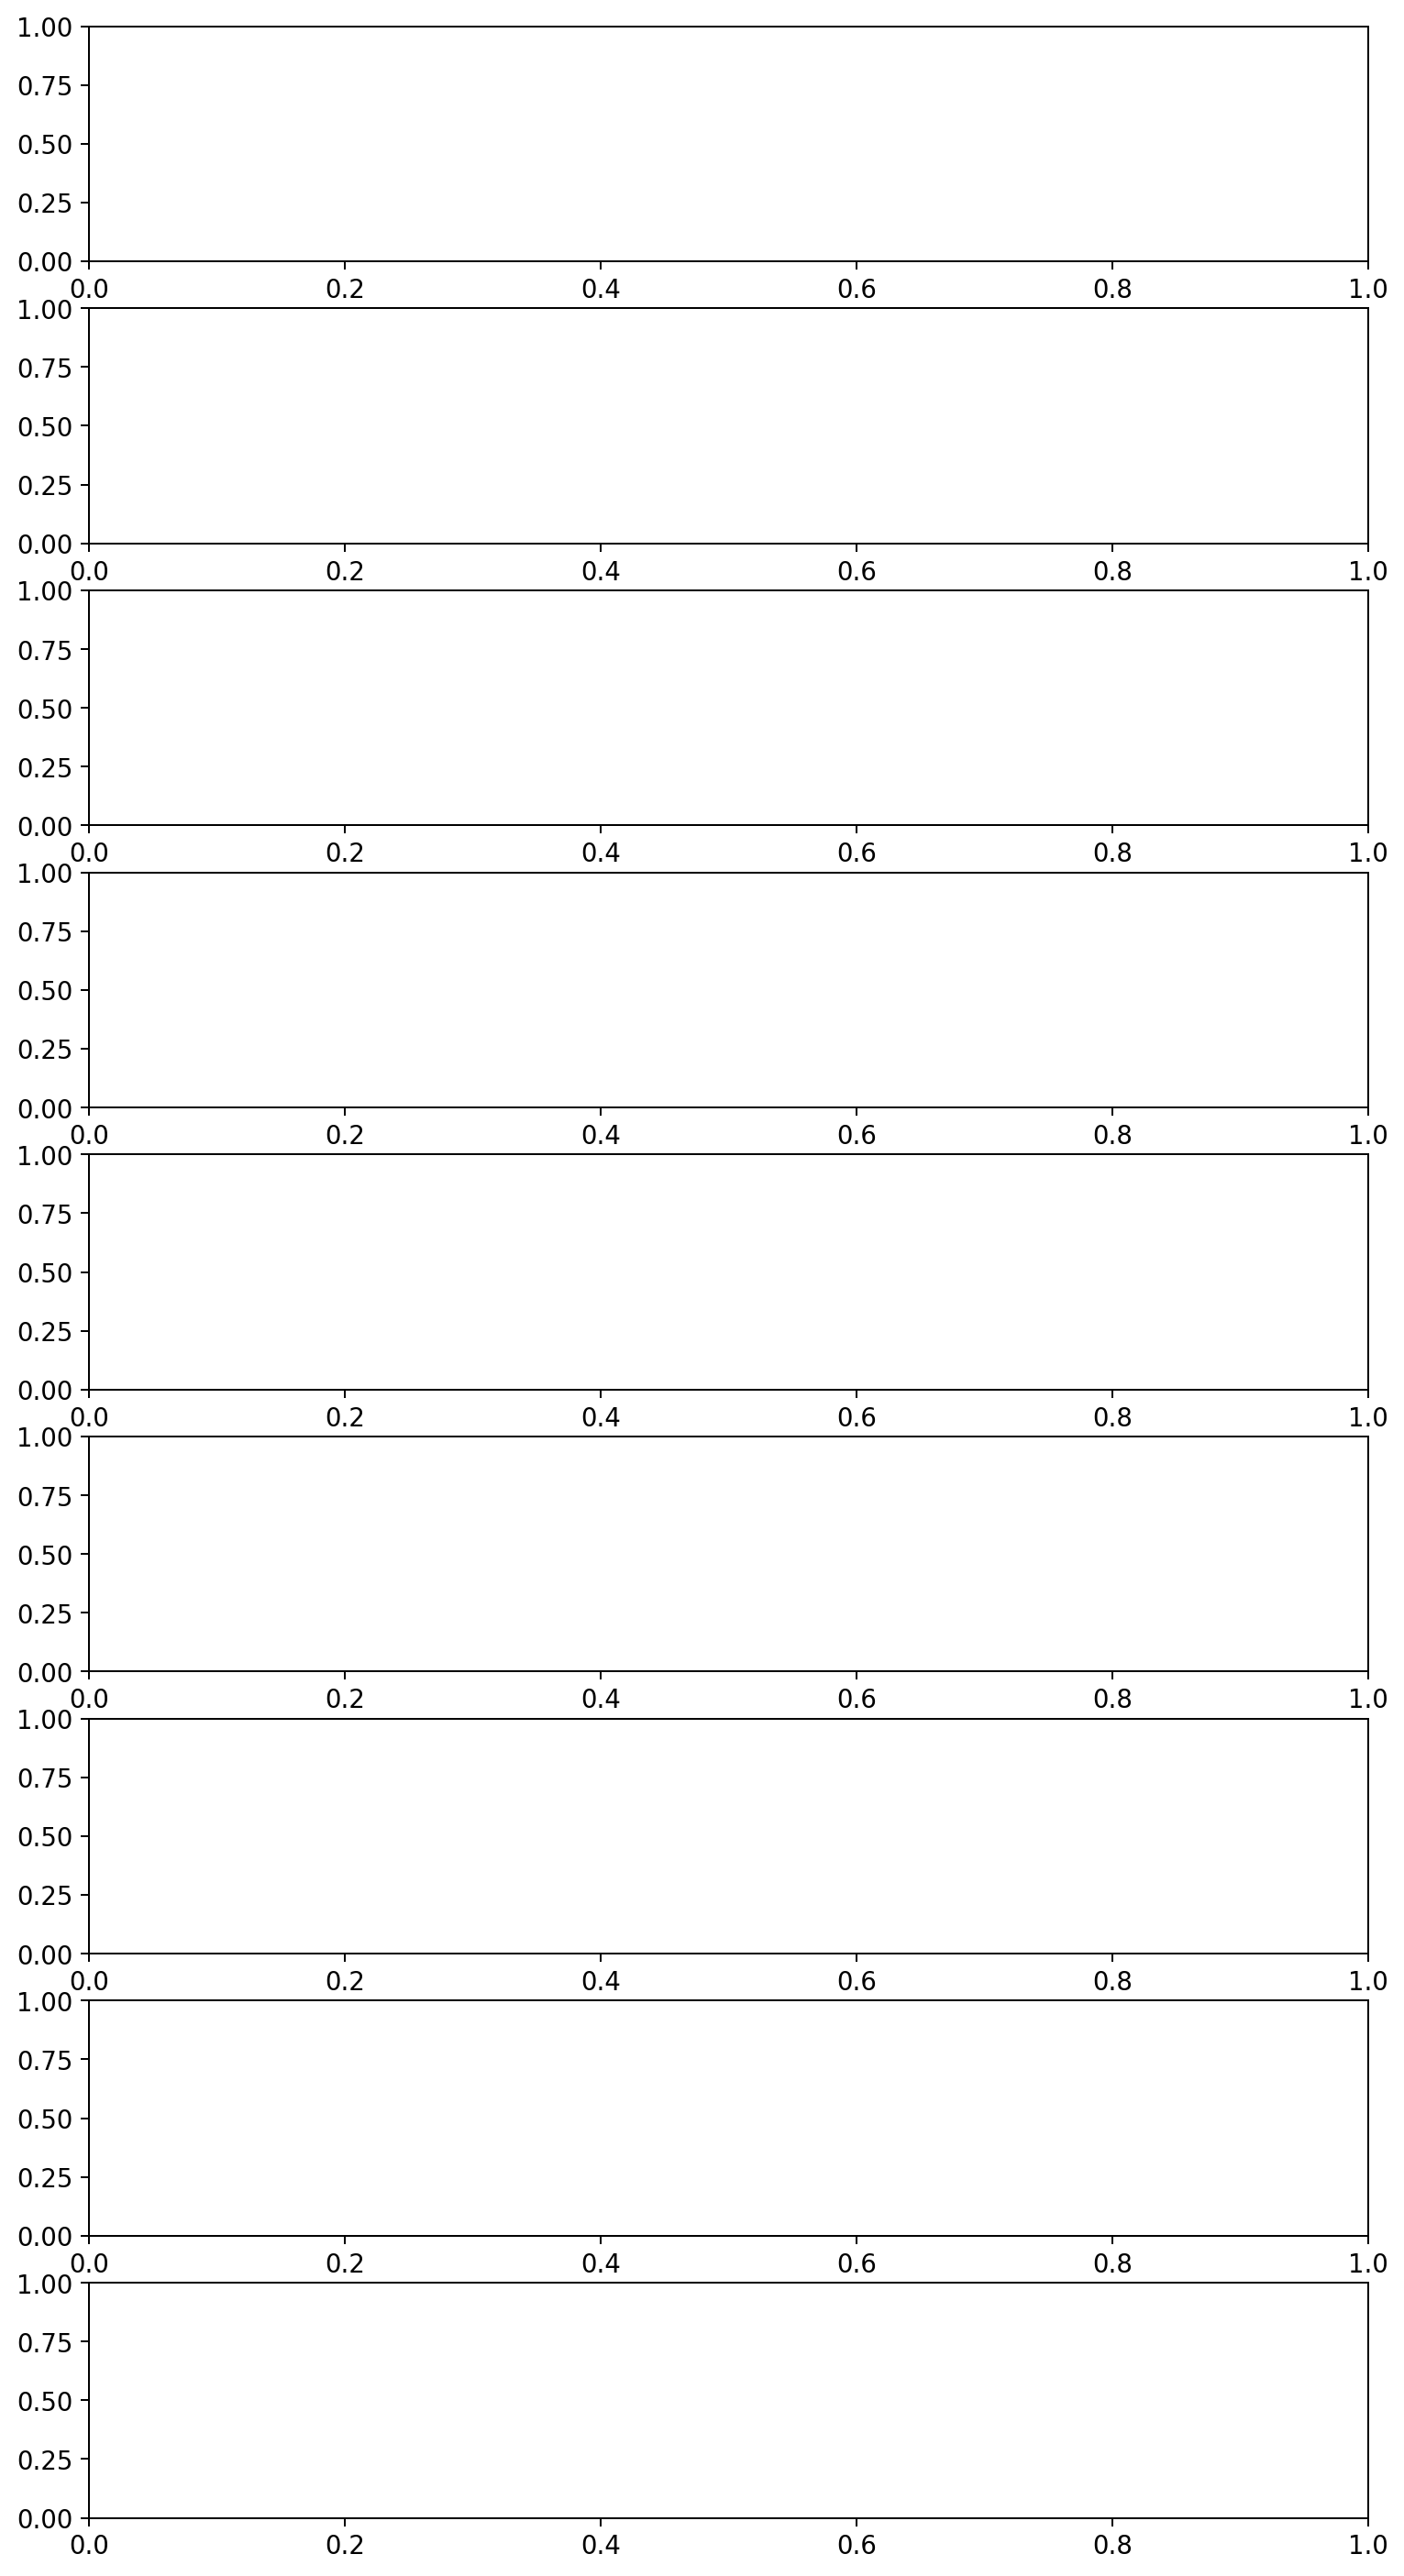

In [83]:


fig, ax = plt.subplots(n_plots,1,figsize=(10,20),dpi=180)

font = {'size'   : 11}
mpl.rc('font', **font)

i= 65+3
for ax1,gda_line_diff,point_midchannel in zip(ax,gda_line_diffs,point_midchannels):

    color = 'tab:blue'

    ax1.set_ylabel(f'{chr(i)} \n elevation m', color='k',fontsize=10)
    i += 1

    ax1.plot(gda_line_diff.sort_values(by ='x' ).x/1000,
             gda_line_diff.sort_values(by ='x' )[f"h_corr_cycle_{cycle_number_from}"]+geoid_correction,'b-',
            label = f"{gda_line[gda_line.cycle_number==cycle_number_from].utc_time.mean().date()}",linewidth=3)

    ax1.plot(gda_line_diff.sort_values(by ='x' ).x/1000,
             gda_line_diff.sort_values(by ='x' )[f"h_corr_cycle_{cycle_number_till}"]+geoid_correction,'c-',
            label = f"{gda_line[gda_line.cycle_number==cycle_number_till].utc_time.mean().date()}",linewidth=3)

    ax1.tick_params(axis='x', labelcolor=color)
#     ax1.set_xticks(yticks)
    mn = np.min(gda_line_diff.sort_values(by ='x' )[f"h_corr_cycle_{cycle_number_till}"])+geoid_correction
    mx = np.max(gda_line_diff.sort_values(by ='x' )[f"h_corr_cycle_{cycle_number_till}"])+geoid_correction
    yyticks = np.linspace(mn-0.5,mx,5).round(1)
    ax1.set_yticks(yyticks)
    ax1.set_ylim([yyticks[0],yyticks[-1]])


    ax1.grid()
#     ax1.legend()

    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

    color = 'tab:red'
     # we already handled the x-label with ax1
    ax2.plot(gda_line_diff.x/1000,gda_line_diff.dhdt,'ro', label='dh/dt',markersize=4)
#     ax2.vlines(point_midchannel[0]/1000,gda_line_diff.dhdt.min(),gda_line_diff.dhdt.max(),color='green',label='surface valley low')

    ax2.tick_params(axis='y', labelcolor=color)
    ax2.grid()
    ax2.set_ylabel('surface change, m/a', color=color)
    ytticks = np.linspace(-1.4,1.4,5)
    ax2.set_ylim([ytticks[0],ytticks[1]])
    ax2.set_yticks(ytticks)
    
    

lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines1 + lines2, labels1 + labels2, loc=0)


ax1.set_xlabel('Easting, polar stereographic, km')

plt.savefig('/Users/home/whitefar/ASSIGNMENTS-PUBLICATIONS-TALKS/channel_data_writeup/PLOTS/icesat2_b.png')
plt.show()

# save location for geophysics overview/Volumes/arc_02/REMOTE_SENSING/ICESAT2/ATLAS/ATLXI/

In [31]:
x = []
y = []
for gda_line_diff in gda_line_diffs:
    x += gda_line_diff.x.tolist()
    y += gda_line_diff.y.tolist()

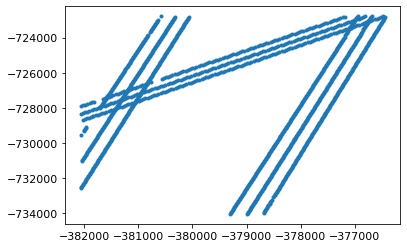

In [34]:
plt.plot(x,y,'.')

In [37]:
np.save('/Volumes/arc_02/REMOTE_SENSING/ICESAT2/ATLAS/ATLXI/icesat2usedpaper.npy',np.array([x,y]))
# np.save('/Volumes/arc_02/REMOTE_SENSING/ICESAT2/ATLAS/ATLXI/y_icesat2usedpaper.npy',y)

In [27]:
[0].keys()

Index(['ref_pt', 'cycle_number', 'h_corr_cycle_3', 'utc_time', 'h_corr_sigma',
       'delta_time', 'latitude', 'longitude', 'referencegroundtrack', 'x', 'y',
       'geometry', 'dates', 'h_corr_cycle_8', 'dh', 'dt', 'dhdt'],
      dtype='object')

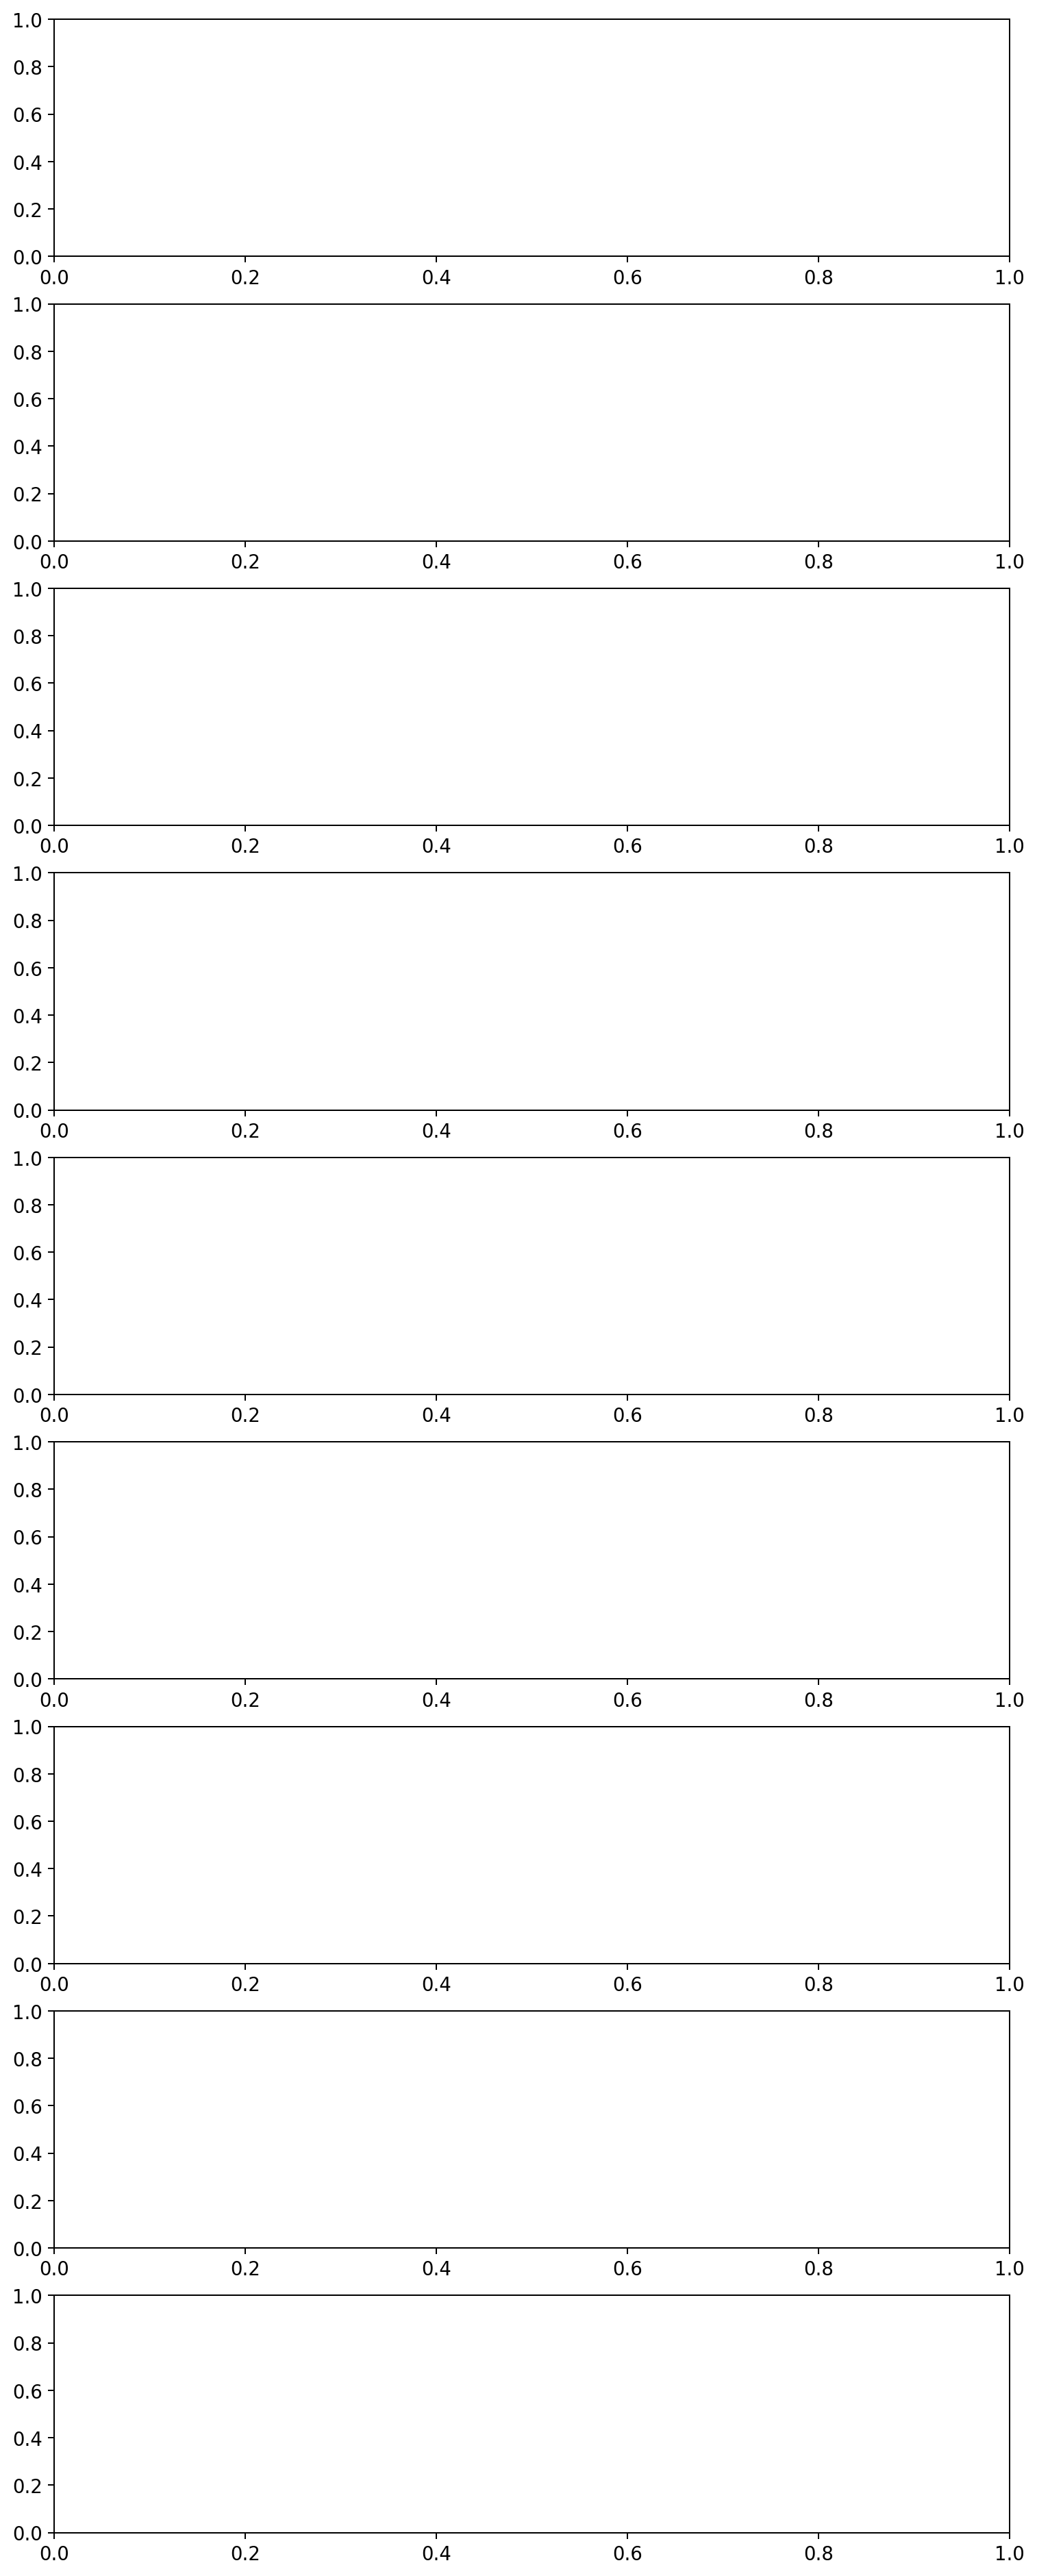

In [84]:
#NOT FOR PAPER

n_plots = len(icesat_lines)

fig, ax = plt.subplots(n_plots,1,figsize=(10,3*n_plots),dpi=180)

font = {'size'   : 11}
mpl.rc('font', **font)

i= 65+3
for ax1,gda_line_diff,point_midchannel in zip(ax,gda_line_diffs,point_midchannels):

    color = 'tab:blue'

    ax1.set_ylabel(f'{chr(i)} \n elevation m', color='k',fontsize=10)
    i += 1

    ax1.plot(gda_line_diff.sort_values(by ='x' ).x/1000,
             gda_line_diff.sort_values(by ='x' )[f"h_corr_cycle_{cycle_number_from}"],'b-',
            label = f"{gda_line[gda_line.cycle_number==cycle_number_from].utc_time.mean().date()}",linewidth=3)

    ax1.plot(gda_line_diff.sort_values(by ='x' ).x/1000,
             gda_line_diff.sort_values(by ='x' )[f"h_corr_cycle_{cycle_number_till}"],'m-',
            label = f"{gda_line[gda_line.cycle_number==cycle_number_till].utc_time.mean().date()}",linewidth=3)

    ax1.tick_params(axis='x', labelcolor=color)
#     ax1.set_xticks(yticks)
    mn = np.min(gda_line_diff.sort_values(by ='x' )[f"h_corr_cycle_{cycle_number_till}"])
    mx = np.max(gda_line_diff.sort_values(by ='x' )[f"h_corr_cycle_{cycle_number_till}"])
    yyticks = np.linspace(mn-0.5,mx,5).round(1)
#     ax1.set_yticks(yyticks)
#     ax1.set_ylim([yyticks[0],yyticks[-1]])


    ax1.grid()
#     ax1.legend()

    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

    color = 'tab:red'
     # we already handled the x-label with ax1
    ax2.plot(gda_line_diff.x/1000,gda_line_diff.dhdt,'ro', label='dh/dt',markersize=4)
#     ax2.vlines(point_midchannel[0]/1000,gda_line_diff.dhdt.min(),gda_line_diff.dhdt.max(),color='green',label='surface valley low')

    ax2.tick_params(axis='y', labelcolor=color)
    ax2.grid()
    ax2.set_ylabel('surface change, m/a', color=color)
    ytticks = np.linspace(-1.4,1.4,5)
#     ax2.set_ylim([ytticks[0],ytticks[1]])
#     ax2.set_yticks(ytticks)
    
    

lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines1 + lines2, labels1 + labels2, loc=0)


ax1.set_xlabel('x, polar steriographic, km')

# plt.savefig('/Users/home/whitefar/ASSIGNMENTS-PUBLICATIONS-TALKS/channel_data_writeup/PLOTS/icesat2_b.png')
plt.show()

In [58]:
yyticks

array([23.7, 26.4, 29.1, 31.8, 34.4])